<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Cryogenic_Memory_Hierarchy_Figure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries (if not already installed in Colab)
!pip install plotly kaleido

In [ ]:
import plotly.graph_objects as go

# Define memory levels
memory_labels = [
    "CPU Registers", "L1 Cache", "L2 Cache", "L3 Cache", "Main Memory (DRAM)", "Storage (SSD/HDD)",
    "Cryo-ASIC Registers", "Cryo-SRAM (4K)", "No Dedicated L2 (Direct Cryo-Memory Access)",
    "No L3 (Uses 77K Memory)", "Cryo-DRAM (77K)", "Room-Temp Storage",
    "FPGA Flip-Flops", "FPGA BRAM", "No Dedicated L2 (FPGA)", "No L3 (FPGA)",
    "External Cryo-DRAM (77K, if used)", "Room-Temp Storage (FPGA)"
]

# Define the source and target node connections
source_nodes = [
    0, 1, 2, 3, 4,   # Conventional Path: Registers -> Cache -> DRAM -> Storage
    6, 7, 8, 9, 10,  # Cryo-CMOS Path: Registers -> Cryo SRAM -> Cryo DRAM -> Storage
    12, 13, 14, 15, 16 # Cryo-FPGA Path: Flip-Flops -> BRAM -> External Cryo DRAM -> Storage
]

target_nodes = [
    1, 2, 3, 4, 5,   # Conventional Path
    7, 8, 9, 10, 11, # Cryo-CMOS Path
    13, 14, 15, 16, 17 # Cryo-FPGA Path
]

# Define flow values (arbitrary values to illustrate proportions)
flow_values = [
    100, 80, 60, 40, 20,  # Conventional
    100, 80, 60, 40, 20,  # Cryo-CMOS
    100, 70, 50, 30, 10   # Cryo-FPGA
]

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15, thickness=20,
        label=memory_labels,
        color=["blue"] * 6 + ["red"] * 6 + ["green"] * 6  # Blue: Conventional, Red: Cryo-CMOS, Green: Cryo-FPGA
    ),
    link=dict(
        source=source_nodes,
        target=target_nodes,
        value=flow_values
    )
))

fig.update_layout(title_text="Memory Hierarchy: Conventional vs. Cryogenic CMOS vs. Cryogenic FPGA", font_size=12)
fig.show()


In [ ]:
import plotly.graph_objects as go

# Define memory hierarchy labels
memory_labels = [
    "CPU Registers", "L1 Cache", "L2 Cache", "L3 Cache", "Main Memory (DRAM)", "Storage (SSD/HDD)",
    "Cryo-ASIC Registers", "Cryo-SRAM (4K)", "No Dedicated L2 (Cryo)", "No L3 (Cryo)", "Cryo-DRAM (77K)", "Room-Temp Storage",
    "FPGA Flip-Flops", "FPGA BRAM", "No Dedicated L2 (FPGA)", "No L3 (FPGA)", "External Cryo-DRAM (77K, if used)", "Room-Temp Storage (FPGA)"
]

# Define source and target connections for memory flow
source_nodes = [
    0, 1, 2, 3, 4,  # Conventional Path
    6, 7, 8, 9, 10,  # Cryo-CMOS Path
    12, 13, 14, 15, 16  # Cryo-FPGA Path
]

target_nodes = [
    1, 2, 3, 4, 5,  # Conventional Path
    7, 8, 9, 10, 11,  # Cryo-CMOS Path
    13, 14, 15, 16, 17  # Cryo-FPGA Path
]

# Define flow values (arbitrary for illustration)
flow_values = [
    100, 80, 60, 40, 20,  # Conventional
    100, 80, 60, 40, 20,  # Cryo-CMOS
    100, 70, 50, 30, 10   # Cryo-FPGA
]

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15, thickness=20,
        label=memory_labels,
        color=["blue"] * 6 + ["red"] * 6 + ["green"] * 6,  # Assign colors per hierarchy
        hoverinfo="all"
    ),
    link=dict(
        source=source_nodes,
        target=target_nodes,
        value=flow_values,
        color="rgba(150, 150, 150, 0.4)"  # Semi-transparent links
    )
))

# Update layout for better visualization
fig.update_layout(
    title_text="Memory Hierarchy: Conventional vs. Cryogenic CMOS vs. Cryogenic FPGA",
    font=dict(
        color="white",  # White text for better visibility
        size=14
    ),
    plot_bgcolor='black'  # Darker background for contrast
)

# Display the interactive figure
fig.show()

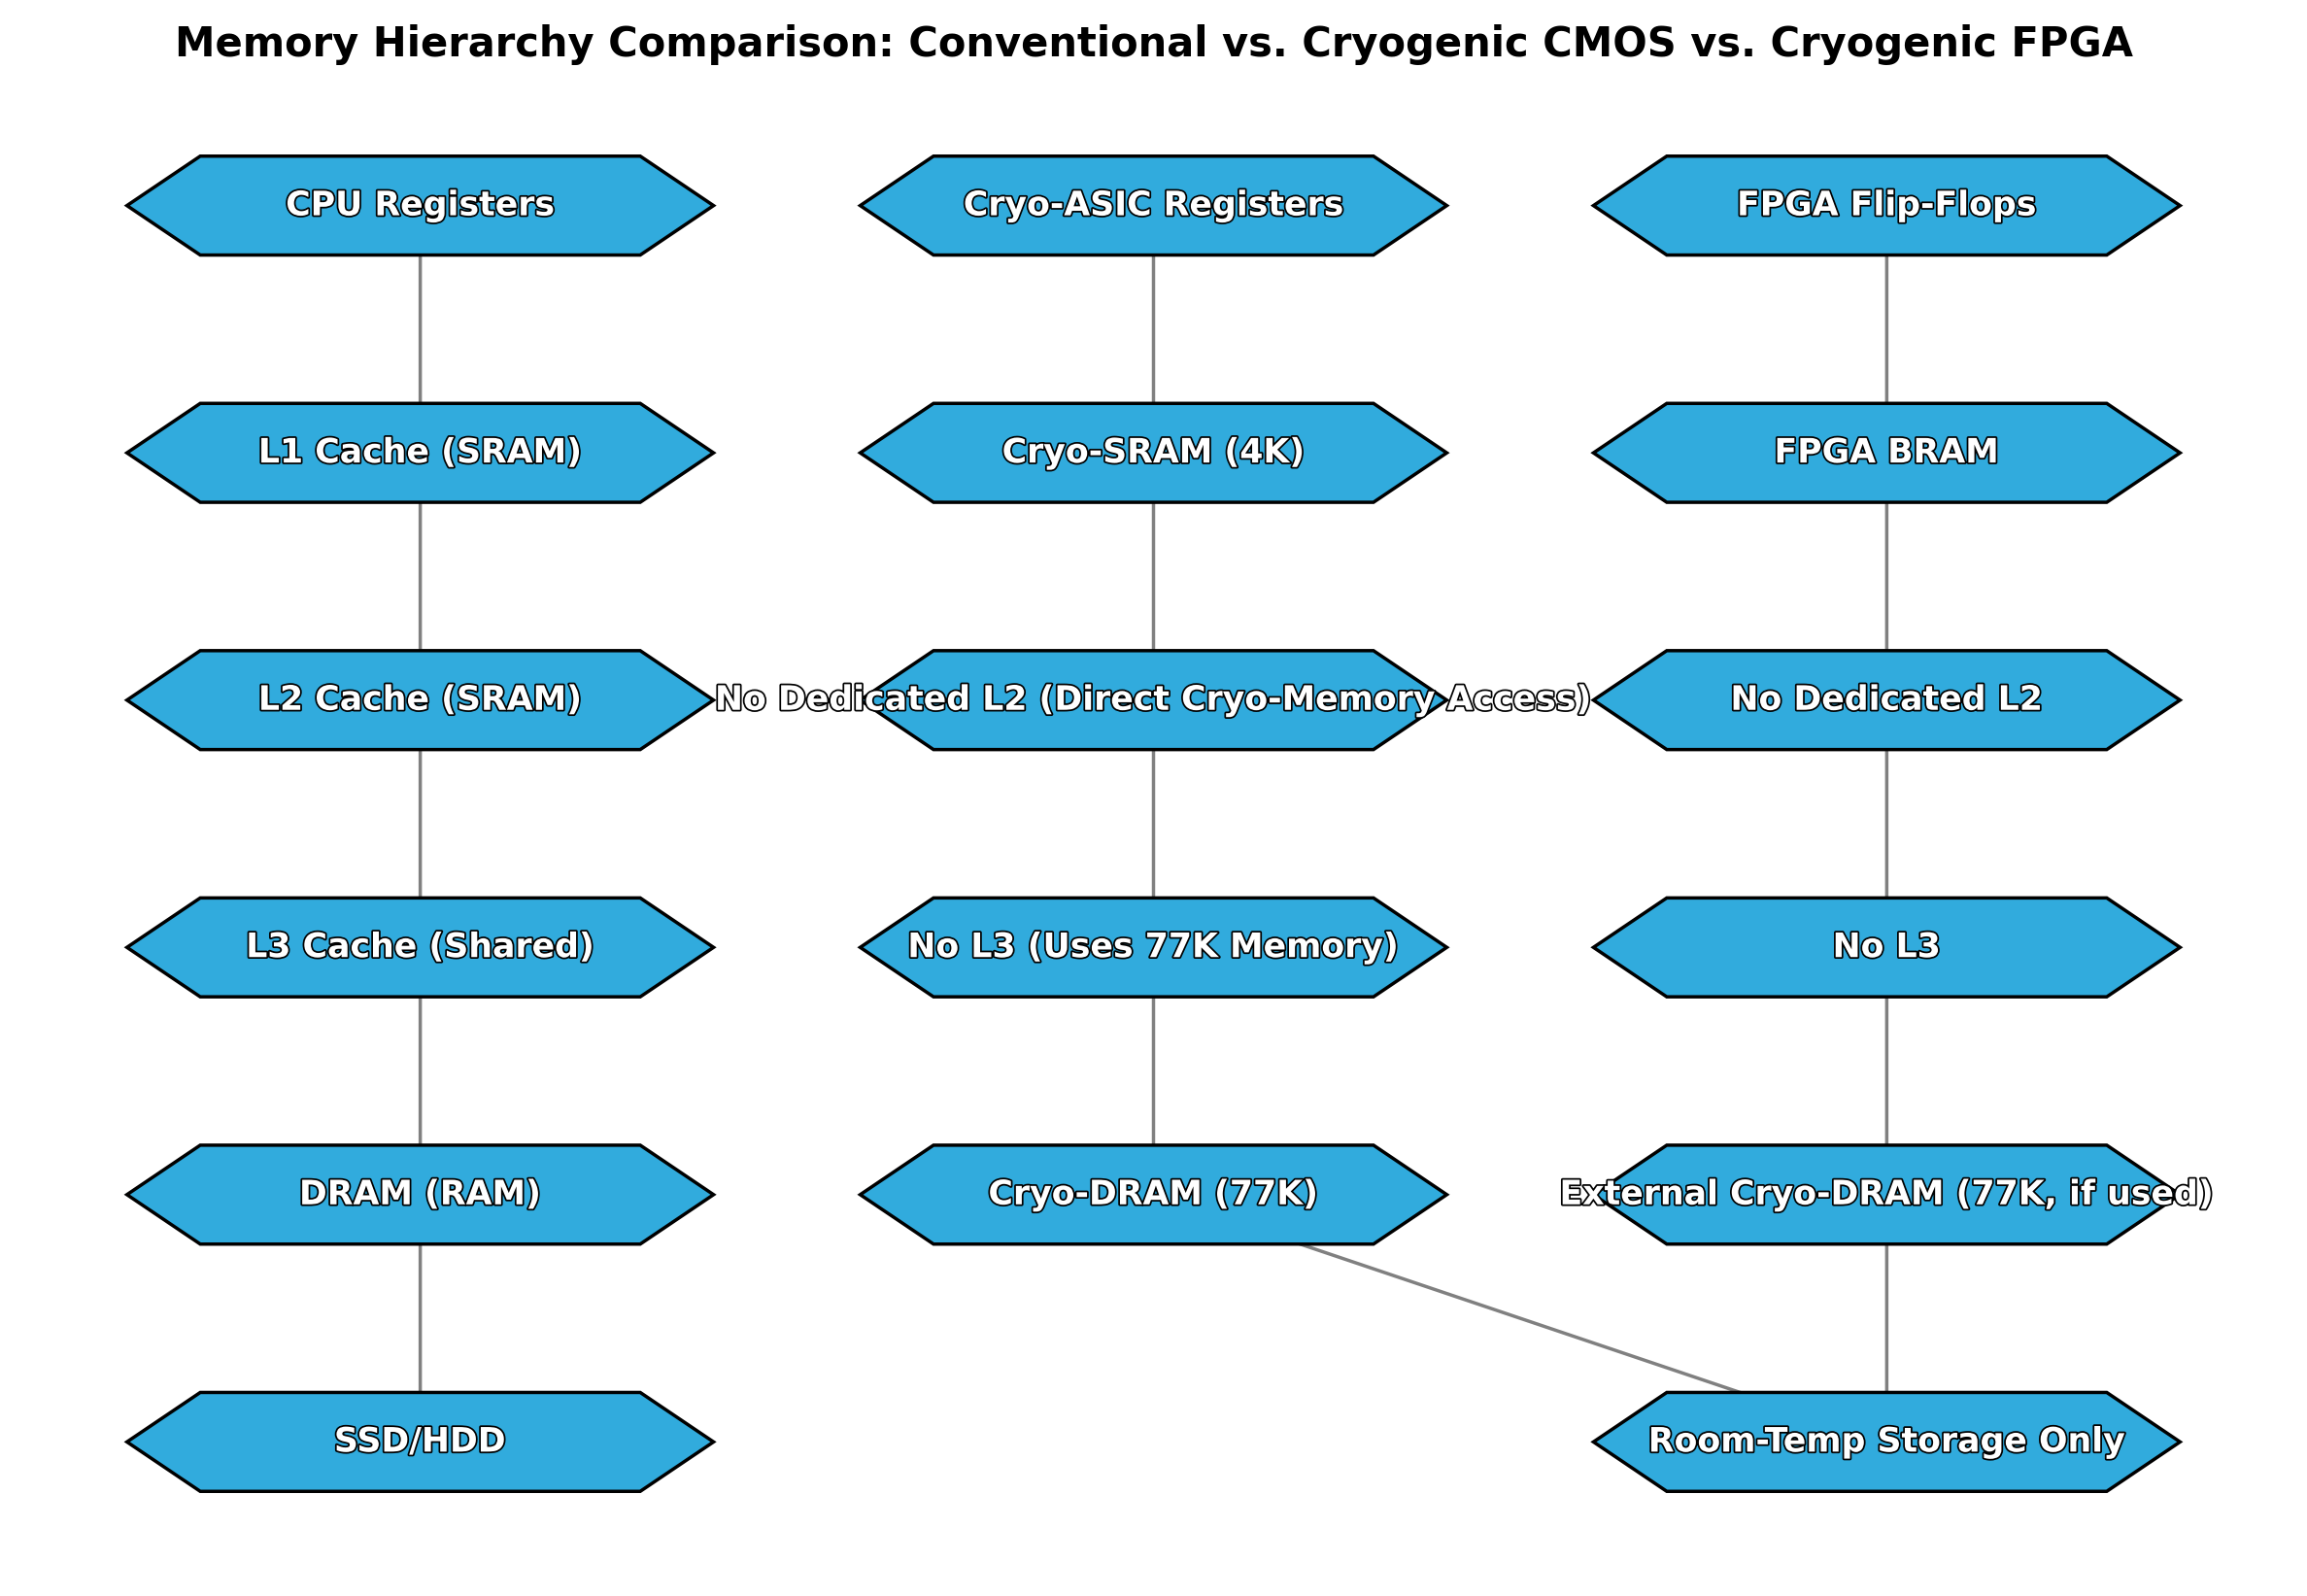

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.patheffects as path_effects

# Create a directed graph
G = nx.DiGraph()

# Define hierarchy levels
hierarchy = {
    "Registers": ["CPU Registers", "Cryo-ASIC Registers", "FPGA Flip-Flops"],
    "L1 Cache": ["L1 Cache (SRAM)", "Cryo-SRAM (4K)", "FPGA BRAM"],
    "L2 Cache": ["L2 Cache (SRAM)", "No Dedicated L2 (Direct Cryo-Memory Access)", "No Dedicated L2"],
    "L3 Cache": ["L3 Cache (Shared)", "No L3 (Uses 77K Memory)", "No L3"],
    "Main Memory": ["DRAM (RAM)", "Cryo-DRAM (77K)", "External Cryo-DRAM (77K, if used)"],
    "Storage": ["SSD/HDD", "Room-Temp Storage Only", "Room-Temp Storage Only"]
}

# Positioning nodes in a structured way
pos = {}
y_offset = 0

# Add nodes and assign positions
for level, nodes in hierarchy.items():
    y_offset -= 1  # Move down in hierarchy
    for i, node in enumerate(nodes):
        G.add_node(node)
        pos[node] = (i, y_offset)

# Define edges to show hierarchy flow
edges = [
    ("CPU Registers", "L1 Cache (SRAM)"),
    ("L1 Cache (SRAM)", "L2 Cache (SRAM)"),
    ("L2 Cache (SRAM)", "L3 Cache (Shared)"),
    ("L3 Cache (Shared)", "DRAM (RAM)"),
    ("DRAM (RAM)", "SSD/HDD"),

    ("Cryo-ASIC Registers", "Cryo-SRAM (4K)"),
    ("Cryo-SRAM (4K)", "No Dedicated L2 (Direct Cryo-Memory Access)"),
    ("No Dedicated L2 (Direct Cryo-Memory Access)", "No L3 (Uses 77K Memory)"),
    ("No L3 (Uses 77K Memory)", "Cryo-DRAM (77K)"),
    ("Cryo-DRAM (77K)", "Room-Temp Storage Only"),

    ("FPGA Flip-Flops", "FPGA BRAM"),
    ("FPGA BRAM", "No Dedicated L2"),
    ("No Dedicated L2", "No L3"),
    ("No L3", "External Cryo-DRAM (77K, if used)"),
    ("External Cryo-DRAM (77K, if used)", "Room-Temp Storage Only")
]

G.add_edges_from(edges)

# Draw the graph with hexagons and drop-shadowed white text
plt.figure(figsize=(12, 8), dpi=250)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color="gray", arrows=True)

# Draw nodes as hexagons
for node, (x, y) in pos.items():
    hexagon = np.array([
        [x - 0.3, y + 0.2],
        [x + 0.3, y + 0.2],
        [x + 0.4, y],
        [x + 0.3, y - 0.2],
        [x - 0.3, y - 0.2],
        [x - 0.4, y],
        [x - 0.3, y + 0.2]
    ])
    plt.fill(hexagon[:, 0], hexagon[:, 1], color="#31abdd", edgecolor="black")

# Draw labels with white text and drop shadow
for node, (x, y) in pos.items():
    text = plt.text(
        x, y, node, fontsize=10, fontweight="bold", color="white",
        ha="center", va="center"
    )
    # Apply drop shadow effect
    text.set_path_effects([
        path_effects.Stroke(linewidth=1, foreground="black"),
        path_effects.Normal()
    ])

plt.title("Memory Hierarchy Comparison: Conventional vs. Cryogenic CMOS vs. Cryogenic FPGA", fontsize=12, fontweight="bold")
plt.axis("off")
plt.show()


### **Brief Comparison of Memory Hierarchies: Conventional vs. Cryogenic (CMOS & FPGA)**  

| **Aspect** | **Conventional Memory Hierarchy (Room Temp.)** | **Cryogenic CMOS Memory Hierarchy (Quantum Computer)** | **Cryogenic FPGA Memory Hierarchy (Quantum Computer)** |
|---|---|---|---|
| **Memory Levels** <br> *(Registers, caches, main memory, storage)* | **Multi-level hierarchy** with registers (L0), **L1/L2/L3 caches**, **main memory (DRAM)**, and **secondary storage (SSD/HDD)**. Hierarchy optimized for throughput and latency reduction. | **Shallow-to-multi-tier** memory hierarchy spanning temperature stages. A **cryo-controller (ASIC at 4K)** has small memory (registers, SRAM). A larger **cryogenic DRAM or SRAM** at ~50–80K (LN2 stage) serves as **main memory**. No disk storage in cryogenic environment; room-temperature host memory is used for slow operations. | **Two-level memory** with **on-chip registers, block RAM (BRAM)** as fast memory. If needed, an **external cryo memory (e.g., DRAM at 77K)** can be interfaced, but most FPGA controllers rely only on internal RAM. Room-temperature storage is used for non-real-time tasks. |
| **Hierarchical Depth & Organization** | **Deep hierarchy (3–4 levels)**: Registers and L1 caches are closest to the CPU, with additional L2/L3 caches shared among cores. Main memory (DRAM) is unified and accessed via a memory controller. Secondary storage (SSD/HDD) is slowest. Caches use coherence protocols (MESI/MOESI) to ensure consistency. | **Moderate hierarchy (2–3 levels)** tailored for quantum control. The cryo-ASIC may use a **small SRAM-based cache** or **scratchpad memory**. Bulk memory is placed at higher temperature stages **(77K cryogenic DRAM or SRAM)**. Coherence mechanisms are minimal to reduce power. Interconnects between stages are designed for **low thermal load and high bandwidth**. | **Two-tier system (on-chip and external memory)**. The FPGA’s **on-chip BRAM** holds control instructions and waveform data. If external cryo-memory is added (at 77K), it serves as a larger storage layer, but **no automatic caching** is present. The memory hierarchy is manually managed in logic. |
| **Interconnects & Interface** | **On-chip interconnects** (buses, rings, meshes) connect caches and cores. The **memory bus** connects DRAM to memory controllers. Off-chip storage is accessed via **SATA, PCIe, NVMe, etc.** | **Cryogenic interconnects** link the **cryo-controller at 4K to memory at 77K**. Superconducting or low-thermal-conductivity wiring minimizes heat transfer. The interface to qubits is through **high-speed DAC/ADC and control lines**, not a traditional memory bus. Data from 300K (host memory) is only accessed infrequently due to latency. | **On-chip routing fabric** connects logic and BRAM. If external memory is used, **high-speed serial links or standard memory controllers** would be used. FPGA configurations are **loaded from a host computer** before operation. |
| **Coherence & Consistency** | **Hardware cache coherence** (MESI/MOESI, directory protocols) ensures a unified memory view. Memory consistency is managed at multiple levels. | **Minimal coherence mechanisms** – typically, a single cryo-controller handles a subset of qubits. If multiple controllers exist, they use **message-passing** or **partitioned memory regions** rather than cache coherence. Memory consistency is ensured in software. | **No coherence protocols** – memory is manually managed. Each FPGA processes a separate set of instructions without needing coherence mechanisms. |
| **Memory Refresh & Technology** | **SRAM caches** require no refresh. **DRAM requires refresh (~64ms at 300K),** adding power overhead. Storage (flash, disk) is non-volatile but slow. | **Mixed memory types:** Small **SRAM or superconducting logic** at 4K for fast access; **cryogenic DRAM at 77K** as bulk storage. DRAM retention improves at cryo (longer refresh intervals). Emerging **MRAM and SFQ-based memory** are being explored for low-power alternatives. | **FPGA Block RAM (BRAM) is static (no refresh needed)**. FPGA configuration memory (SRAM-based) retains state across cryogenic temperatures. If an external DRAM at 77K is used, refresh cycles are required. |
| **Latency (per Level)** | **Registers:** ~1 CPU cycle <br> **L1 Cache:** 1–4 ns <br> **L2 Cache:** 5–15 ns <br> **L3 Cache:** 20–50 ns <br> **Main Memory (DRAM):** 50–100 ns <br> **Storage (SSD/HDD):** 100 µs – ms | **Registers:** ~1–2 ns (Cryo-ASIC) <br> **Cryo SRAM (4K):** 2–10 ns <br> **Cryogenic DRAM (77K):** ~50 ns (3× faster than room-temp DRAM) <br> **Room-temp DRAM (300K):** Avoided (~µs delays due to cables) | **On-chip BRAM:** 5–10 ns <br> **External Cryo Memory (if used, 77K DRAM):** ~50–100 ns <br> **Room-temp storage:** Microseconds (if data must be streamed) |
| **Power and Thermal Considerations** | **High power consumption**, but easily managed via cooling fans and liquid cooling. DRAM consumes power for refresh and activation. Large-scale memory systems can consume kilowatts. | **Severe power constraints at cryo:** <br> Power at 4K is **limited to milliwatts to watts**. Leakage is reduced at cryo, but heat dissipation is a major constraint. **Power gating and superconducting interconnects** help reduce heat load. **Memory is placed at different temperature stages (4K vs. 77K)** to balance power consumption and capacity. | **Moderate power usage:** FPGAs are **less efficient than ASICs** but can operate at reduced voltages at cryo. BRAM is low-power, but routing and logic switches add dynamic power. Scaling up to multiple FPGAs increases power dissipation. |
| **Scalability (Capacity & Bandwidth)** | **Scalable in size and performance**: <br> Add more **DIMMs for DRAM** capacity, add **storage for larger datasets**. High memory bandwidth is achieved with **multiple memory channels** and **HBM/3D DRAM**. | **Scalability is limited by cryo-cooling capacity**: <br> Memory at **4K is restricted to small sizes**, but **77K memory can be scaled up** for more capacity. **More cryo-controllers can be added**, each with its local memory, to handle larger qubit arrays. Bandwidth scales with the number of interconnects, but wiring limits in cryostats impose constraints. | **Scalability depends on adding more FPGAs**: <br> A single FPGA has limited on-chip memory. **Multiple FPGAs can distribute workload**, but inter-FPGA communication adds complexity. External cryo-memory (e.g., DRAM at 77K) can be used for larger datasets but adds routing and latency challenges. |
| **Suitability for Quantum Computing** | **Not ideal for direct quantum integration**: <br> Room-temp DRAM and SSDs are **too slow and too far** from the qubits. Data must be streamed over long cables, introducing **microsecond delays**, making real-time quantum feedback infeasible. Used only for **offline storage and pre-processing**. | **Highly suited for quantum-classical integration**: <br> Cryogenic memory is placed **near qubits (4K & 77K)** to enable **fast quantum error correction** and control sequences. **Cryo-ASICs can issue real-time feedback (<1µs latency)**, making them essential for large-scale quantum computing. Requires custom silicon design, but **offers the best performance for superconducting qubits**. | **Good for near-term quantum experiments**: <br> Cryo-FPGAs allow **reconfigurable quantum control** and can implement real-time classical feedback. **On-chip BRAM enables cycle-accurate control**, but memory size is limited. **Best for flexible small- to mid-scale quantum experiments**; may not scale well for fault-tolerant quantum computing due to power and capacity constraints. |

---

### **Key Takeaways**
1. **Conventional memory hierarchies** rely on deep caches and high-speed DRAM, **unsuitable for direct qubit integration** due to high latency and the 300K-to-mK bottleneck.
2. **Cryogenic CMOS memory hierarchies** embed memory **near qubits at 4K & 77K**, enabling **fast, real-time quantum control** and error correction.
3. **Cryogenic FPGA memory hierarchies** offer **flexibility and reconfigurability** but are **limited in scalability and efficiency** compared to dedicated cryo-ASICs.

---

# Comparison of Memory Hierarchies: Conventional vs. Cryogenic (CMOS & FPGA)

**Overview:** Conventional computer systems use a well-defined **memory hierarchy** (room-temperature) to bridge the speed gap between fast processors and slow memory, relying on multiple cache levels and DRAM main memory ([](https://www.cs.cmu.edu/afs/cs/academic/class/15213-m22/www/lectures/10-memory-hierarchy.pdf#:~:text=%EF%82%A2%20Some%20fundamental%20and%20enduring,for%20many%20types%20of%20programs)) ([](https://www.cs.cmu.edu/afs/cs/academic/class/15213-m22/www/lectures/10-memory-hierarchy.pdf#:~:text=%E2%96%AA%20SRAM%20access%20time%20is,2%2C500%20times%20slower%20than%20DRAM)). In emerging quantum computers, **cryogenic embedded memory** is placed near the qubits at low temperature to enable fast classical control. Two approaches are being explored: custom **cryo-CMOS** ASIC controllers and **cryo-FPGA** platforms operating at cryogenic temperatures. The table below compares the memory hierarchy structures of: **(1)** a conventional room-temperature system, **(2)** an embedded cryo-CMOS memory hierarchy in a quantum computer, and **(3)** an embedded cryo-FPGA memory hierarchy in a quantum computer, across levels, structure, performance, and quantum suitability.

| **Aspect** | **Conventional Memory Hierarchy (Room Temp.)** | **Cryogenic CMOS Memory Hierarchy (Quantum Computer)** | **Cryogenic FPGA Memory Hierarchy (Quantum Computer)** |
|---|---|---|---|
| **Memory Levels** <br>*(Registers, caches, main memory, storage)* | **Multi-level** hierarchy with several tiers of memory. Small **CPU registers** at the top (L0), then **L1/L2/L3 caches** (on-chip SRAM) and **main memory** (off-chip DRAM). Optional **secondary storage** (SSD/HDD) sits at the bottom for non-volatile data ([](https://www.cs.cmu.edu/afs/cs/academic/class/15213-m22/www/lectures/10-memory-hierarchy.pdf#:~:text=%E2%96%AA%20Fast%20storage%20technologies%20cost,known%20as%20a%20memory%20hierarchy)) ([](https://www.cs.cmu.edu/afs/cs/academic/class/15213-m22/www/lectures/10-memory-hierarchy.pdf#:~:text=%E2%96%AA%20SRAM%20access%20time%20is,2%2C500%20times%20slower%20than%20DRAM)). For example, a modern CPU might have 32KB L1, 256KB+ L2, a shared few MB L3, gigabytes of DRAM, and terabytes of disk. | **Shallow-to-multi-tier** memory hierarchy within the cryostat. A **cryo-controller** (ASIC at ~4 K) includes small local memories (register file, possible L1 cache or SRAM scratchpad) for fast access ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=A%20quantum%20program%20can%20be,2)). Larger memory is placed at higher temperature stages: e.g. a **cryogenic DRAM** or SRAM at ~50–80 K (LN2 stage) serving as the main memory ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=of%20hybrid%20memories%20placed%20at,20mK%2C%204K%2C%2077K%2C%20120K%20as)) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=three%20to%20four%20temperature%20levels,leakage%20current%20is%20dramatically%20reduced)). The room-temperature host memory (300 K) may act as an external storage but is not used for fast operations due to latency ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=superconducting%20memory%20can%20be%20utilized,which%20requires%20superconducting%20memories%20and)). No traditional disk storage in the cryogenic environment (persistent storage remains at room temp if needed). | **Two-level (on-chip + optional external)** memory is typical. The FPGA’s configurable logic provides **flip-flops/registers** and on-chip **Block RAM** (BRAM) as fast memory (analogous to cache/SRAM) ([[1602.05786] A Reconfigurable Cryogenic Platform for the Classical Control of Scalable Quantum Computers](https://arxiv.org/abs/1602.05786#:~:text=Extensive%20characterization%20of%20the%20platform,relatively%20stable%20performance%20over%20temperature)). This on-chip memory holds control instructions, waveforms, or buffering data. If larger memory is required, an external cryo-compatible memory (e.g. a DRAM at 77 K) could be interfaced, but current FPGA-based controllers primarily use on-chip RAM (limited capacity). Long-term storage and large programs are loaded from room-temperature systems before operation. |
| **Hierarchical Depth & Organization** | **Deep hierarchy (3–4 levels)**: Registers and L1 caches are closest to the CPU, with additional L2/L3 caches per core or shared among cores ([](https://www.cs.cmu.edu/afs/cs/academic/class/15213-m22/www/lectures/10-memory-hierarchy.pdf#:~:text=%E2%96%AA%20Fast%20storage%20technologies%20cost,known%20as%20a%20memory%20hierarchy)). Caches are typically organized as **split L1** (separate I/D caches) and unified lower levels. Main memory (DRAM) is unified and accessed via a memory controller; secondary storage is accessed via I/O controllers. This hierarchy exploits spatial/temporal locality to hide latency ([](https://www.cs.cmu.edu/afs/cs/academic/class/15213-m22/www/lectures/10-memory-hierarchy.pdf#:~:text=%EF%82%A2%20Some%20fundamental%20and%20enduring,for%20many%20types%20of%20programs)). Multi-core CPUs maintain **cache coherence** (MESI/MOESI protocols, directories) across caches ([mmi2010020016 16..29](https://ece757.ece.wisc.edu/uw-only/10_opteron.pdf#:~:text=Directory%20behavior,any%20cache%20castouts%20of%20M)). Overall organization is highly optimized for general-purpose workloads. | **Moderate hierarchy (2–3 levels)** tailored to control requirements. The cryo-ASIC may not use large multi-level caches due to power constraints – often a single-level **embedded SRAM** or small cache serves the controller’s immediate needs ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=power%20and%20a%20performance%20perspective,at%20room%20tem%02perature%20will%20have)). A higher-level **cryogenic main memory** (large **CMOS memory** at 77 K or 4 K) provides the bulk capacity ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=of%20hybrid%20memories%20placed%20at,20mK%2C%204K%2C%2077K%2C%20120K%20as)). Research proposes using ultra-fast but low-density **superconducting memory** (e.g. SFQ registers or Josephson-based RAM) as L1 cache, and higher-density CMOS memory as L2/Main memory at a slightly warmer stage ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=power%20and%20a%20performance%20perspective,at%20room%20tem%02perature%20will%20have)). This hierarchical organization is distributed across temperature stages (4 K controller, 50–80 K memory), linked by cryogenic interconnects. Cache coherence is minimal – typically a single control processor or a few cores partition tasks, avoiding the need for complex coherence (simplifying design and saving power). |
| **Interconnects & Interface** | **On-chip interconnects** (buses, rings, meshes) connect caches and cores; **memory bus** or high-speed channels connect the memory controller to DRAM. Coherence traffic and memory requests travel over these interconnects. Off-chip, PCB traces connect DRAM modules; storage uses SATA/PCIe, etc. These interconnects are all at room temperature, with high bandwidth and relatively low latency (nanosecond delays). | **Cryogenic interconnects** link the cryo-controller and memory across temperature layers. The control ASIC at 4 K connects to cryo-memory at 77 K via high-density wires or cables that traverse the cryostat ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=computer%2C%20a%20control%20processor%20needs,to%20the%20large%20temperature%20gradient)). To minimize heat load, the wiring count is limited and materials are chosen for low thermal conductance (e.g. superconducting interconnects at the cold stage) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=300%20K%20Memory%20%28Cryo,a%20scalable%20superconduct%02ing%20quantum%20computer)) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=computer%2C%20a%20control%20processor%20needs,to%20the%20large%20temperature%20gradient)). On-chip within the cryo-ASIC, standard bus or network-on-chip can be used for its internal registers/SRAM. The interface to the quantum processor is through fast DAC/ADC and control lines rather than a traditional memory bus ([Using Cryogenic CMOS Control Electronics to Enable a Two-Qubit Cross-Resonance Gate  |  PRX Quantum](https://link.aps.org/doi/10.1103/PRXQuantum.5.010326#:~:text=integrated%20circuit%20,qubit%20error)) ([Using Cryogenic CMOS Control Electronics to Enable a Two-Qubit Cross-Resonance Gate  |  PRX Quantum](https://link.aps.org/doi/10.1103/PRXQuantum.5.010326#:~:text=thermalized%20at%204%20K%20and,associated%20with%20using%20a%20low)). The cryo-memory is typically memory-mapped into the controller’s address space or accessed via a custom protocol, and the 300 K host communicates with the 4 K control module through a limited bandwidth link for program load or readout. | **On-chip FPGA routing fabric** provides interconnect between logic and BRAM (very fast, within a single chip at 4 K). The FPGA’s memory interface is essentially the configurable logic accessing BRAM via dedicated low-latency routes. If an external cryo memory is used, standard memory interfaces (e.g. a DRAM memory controller core) would drive I/O pins connected through the cryostat. In practice, FPGAs tested at 4 K have used the FPGA’s internal resources without external memory ([[1602.05786] A Reconfigurable Cryogenic Platform for the Classical Control of Scalable Quantum Computers](https://arxiv.org/abs/1602.05786#:~:text=Extensive%20characterization%20of%20the%20platform,relatively%20stable%20performance%20over%20temperature)). Communication between a cryo-FPGA and room-temperature systems (for initial configuration or monitoring) goes through a few coax or copper links, kept minimal to reduce thermal load ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=number%20of%20qubits%2C%20it%20is,for%20a%20scalable%20control%20processor)). The FPGA thus acts as a self-contained control unit near the qubits, with its on-chip memory directly interfaced to its logic. No cache coherence mechanism is needed (single-chip, single-threaded logic control). |
| **Coherence & Consistency** | **Cache coherence** protocols ensure a consistent view of memory in multi-core systems ([mmi2010020016 16..29](https://ece757.ece.wisc.edu/uw-only/10_opteron.pdf#:~:text=Directory%20behavior,any%20cache%20castouts%20of%20M)). Hardware coherence (MESI/MOESI or directory-based) keeps caches in sync, incurring complexity and extra traffic. Main memory provides a coherent point for all cores. The memory hierarchy maintains consistency (through flushes, fencing, etc.) so software sees a coherent memory model. | **Minimal coherence needs** – often a single control processor core at cryo handles a set of qubits, so no multi-core coherence is required. If multiple cryo-controllers exist, they can be assigned disjoint qubit subsets or use message-passing to avoid shared-memory contention. This avoids the power overhead of coherence hardware. Memory consistency is managed in software if needed (e.g. by partitioning memory per qubit zone). Thus, the cryo memory hierarchy can be simpler (no large coherence directories or snooping logic), which is advantageous given the limited power budget. | **No coherence overhead** – the FPGA’s memory (BRAM) is explicitly managed by the programmed logic. There are no implicit caches, and all memory is essentially scratchpad or register memory for that logic. If multiple FPGAs are used, their coordination is done via higher-level protocols or separate memory regions, not a transparent cache coherence mechanism. This simplicity avoids extra switching activity that a coherence protocol would entail, which is beneficial in the cryogenic context. |
| **Memory Refresh & Technology** | **SRAM caches** are static (no refresh needed) and use 6T cells. **DRAM main memory** is dynamic and requires periodic **refresh** (~ every 64 ms at 300 K) to retain data. Refresh operations incur overhead and power draw. Storage (flash, disk) uses non-volatile media with no refresh but much slower access. The hierarchy’s technologies are optimized for room temperature: CMOS for SRAM/logic and charge-based DRAM capacitors for main memory ([](https://www.cs.cmu.edu/afs/cs/academic/class/15213-m22/www/lectures/10-memory-hierarchy.pdf#:~:text=%E2%96%AA%20SRAM%20access%20time%20is,2%2C500%20times%20slower%20than%20DRAM)). | **Mixed memory technologies:** small, fast memory at 4 K may use **superconducting or SRAM** technology (no refresh), while the larger cryo main memory can be **DRAM or eDRAM** operating at cryogenic temperature ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=power%20and%20a%20performance%20perspective,at%20room%20tem%02perature%20will%20have)) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=of%20hybrid%20memories%20placed%20at,20mK%2C%204K%2C%2077K%2C%20120K%20as)). DRAM at 77 K still needs refresh, though lower leakage at cryo can **extend retention times** ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=limits%20the%20memory%20capacity,Prior%20Work%20on%20Cryogenic%20DRAM)) (potentially reducing refresh frequency). Custom embedded DRAM designs for cryo (e.g. 3T1C gain-cell eDRAM) have been proposed to deal with transistor threshold shifts and ensure data retention at 4 K ([A 28-nm 10.4-fJ/b Cryogenic embedded DRAM with 3T1C Gain Cell ...](https://ieeexplore.ieee.org/document/10762394/#:~:text=A%2028,a%203T1C%20gain%20cell%20structure)). Emerging **non-volatile memories** (e.g. spin-transfer MRAM) are also promising for cryogenic caches, offering no refresh and lower leakage; studies show STT-MRAM caches outperform SRAM in read latency and power at 77 K ([Is the Future Cold or Tall? Design Space Exploration of Cryogenic and 3D Embedded Cache Memory | Request PDF](https://www.researchgate.net/publication/371906076_Is_the_Future_Cold_or_Tall_Design_Space_Exploration_of_Cryogenic_and_3D_Embedded_Cache_Memory#:~:text=This%20paper%20evaluates%20the%20potential,in%20read%20and)). Thus, the cryo hierarchy may employ SRAM/MRAM for fast tiers and DRAM for large capacity, balancing refresh needs with power. | **Static on-chip memory:** FPGA block RAM is built from SRAM cells, which do not need refresh even at cryo. The FPGA’s configuration memory (also SRAM-based) and BRAM have been shown to retain state correctly from 300 K down to 4 K ([[1602.05786] A Reconfigurable Cryogenic Platform for the Classical Control of Scalable Quantum Computers](https://arxiv.org/abs/1602.05786#:~:text=Extensive%20characterization%20of%20the%20platform,relatively%20stable%20performance%20over%20temperature)). This means the FPGA’s memory is inherently suitable for cryo without modification, aside from timing/reliability verification. If an external DRAM were used at 77 K, refresh would be required, similar to the cryo-CMOS case (and likely handled by an FPGA memory controller). In practice, current cryo-FPGA controllers avoid dynamic refresh by using only static on-chip memory. |
| **Latency (per Level)** | **Latency increases down the hierarchy:** Registers are architecturally “instant” (1 CPU cycle access). L1 caches have ~1–4 ns access (~2–4 CPU cycles), L2 ~5–15 ns, L3 tens of ns; DRAM main memory ~50–100 ns (hundreds of cycles) ([](https://www.cs.cmu.edu/afs/cs/academic/class/15213-m22/www/lectures/10-memory-hierarchy.pdf#:~:text=%E2%96%AA%20SRAM%20access%20time%20is,2%2C500%20times%20slower%20than%20DRAM)). For instance, a typical L1 hit might be 4 ns vs a DRAM access ~60 ns ([](https://www.cs.cmu.edu/afs/cs/academic/class/15213-m22/www/lectures/10-memory-hierarchy.pdf#:~:text=%E2%96%AA%20SRAM%20access%20time%20is,2%2C500%20times%20slower%20than%20DRAM)). Storage is **orders of magnitude** slower (SSD µs, HDD ms range) ([](https://www.cs.cmu.edu/afs/cs/academic/class/15213-m22/www/lectures/10-memory-hierarchy.pdf#:~:text=%E2%96%AA%20SRAM%20access%20time%20is,2%2C500%20times%20slower%20than%20DRAM)). The hierarchy is designed so ~90%+ of accesses hit in caches, amortizing the long main memory latency. | **Latency is minimized by proximity:** A cryo-controller’s local SRAM could be as fast as a few nanoseconds (similar to an L1 cache). The cryogenic main memory at 77 K sees somewhat improved access times compared to room temp – experiments by IBM showed a ~3× reduction in DRAM latency at cryogenic temperatures ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=During%20the%20late%201980s%2C%20IBM,DRAM%20used%20a%20long)) (due to higher carrier mobility and lower resistances at 77 K). Thus, a cryo-DRAM might respond in tens of ns or faster ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=During%20the%20late%201980s%2C%20IBM,DRAM%20used%20a%20long)). The interconnect delay between 4 K and 77 K is small (physical separation is short), so accessing the cryo-memory is still much faster than reaching a 300 K memory over long cables. Overall, the effective latency hierarchy might be: ~ns for on-chip SRAM, a few tens of ns for 77 K memory, and hundreds of ns (plus protocol overhead) if falling back to room-temperature memory (which is avoided for real-time operation ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=superconducting%20memory%20can%20be%20utilized,which%20requires%20superconducting%20memories%20and))). There is currently no “storage” tier at cryo – long-term data must be sent to room temp, which is too slow for control loops. | **Latency on FPGA** is low for on-chip memory: a BRAM access might take 1–2 FPGA clock cycles (e.g. ~5–10 ns depending on clock speed). Because the FPGA logic typically runs at a moderate frequency (tens to a few hundred MHz at cryo), absolute latencies of a few nanoseconds to access local memory are negligible relative to qubit operation times. If no cache hierarchy is used, every access to data can hit in these on-chip memories deterministically. In the event of requiring external memory, the latency would jump (similar tens of ns or more, plus transmission delay). However, current cryo-FPGA control schemes keep critical data in BRAM, ensuring cycle-accurate real-time performance. The **lack of deep hierarchy** means no cache miss penalties – the design must explicitly fit needed data into the available fast memory. |
| **Power and Thermal Considerations** | **Power vs performance trade-off:** Faster memory technologies (SRAM, DRAM) consume power (SRAM leakage, DRAM refresh and activation energy). A conventional memory hierarchy is power-hungry but managed by robust cooling (fans, heat sinks at room temp). For example, large L3 caches can significantly add to chip static power, and DRAM consumes power per access and for refresh. Data centers devote substantial energy to memory: e.g., US data centers consumed ~205 TWh in 2018 ([](https://arxiv.org/pdf/2111.09436#:~:text=this%20aggressive%20scaling%20comes%20with,generally%20faster%20and%20more%20energy)). Scaling up memory size or speed increases power draw, which is dissipated as heat at room temperature (relatively easy to remove with airflow or liquid cooling). The design goal is often maximizing performance within a given power budget (e.g., TDP of a CPU), tolerating high absolute power as long as cooling is feasible. | **Severe power constraints at cryo:** Any power dissipated at 4 K or 20 mK places a load on the cryogenic refrigerator. The cooling power at millikelvin/kelvin stages is extremely limited (milliwatts at mK, a few watts at 4 K). Thus, the memory hierarchy must be **ultra-low-power**. This impacts technology choices (favoring low-leakage CMOS and even exploring **passive or supercond. logic/memory**). Indeed, at 77 K CMOS leakage is dramatically reduced and transistor drive improves, helping reduce active power for memory operations ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=limits%20the%20memory%20capacity,Prior%20Work%20on%20Cryogenic%20DRAM)). Even so, a cryo-CMOS controller chip consumes on the order of tens of mW per qubit in current demos ([Using Cryogenic CMOS Control Electronics to Enable a Two-Qubit Cross-Resonance Gate  |  PRX Quantum](https://link.aps.org/doi/10.1103/PRXQuantum.5.010326#:~:text=refrigerator%20and%20the%20measured%20power,71%20instructions%20per%20Clifford%20%28IPC)), which can quickly scale to watts and threaten the fridge limits. For example, one 4 K CMOS control ASIC used ~23 mW/qubit for active drive ([Using Cryogenic CMOS Control Electronics to Enable a Two-Qubit Cross-Resonance Gate  |  PRX Quantum](https://link.aps.org/doi/10.1103/PRXQuantum.5.010326#:~:text=refrigerator%20and%20the%20measured%20power,71%20instructions%20per%20Clifford%20%28IPC)) – scaled to hundreds of qubits this would overwhelm a dilution refrigerator’s cooling capacity. Therefore, cryo memory hierarchies emphasize efficiency: small memories at 4 K to limit static power, leveraging higher-temperature stages (50–80 K) for larger memory since those stages can handle more heat ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=three%20to%20four%20temperature%20levels,leakage%20current%20is%20dramatically%20reduced)). Techniques like power gating, pulse gating, and using **non-volatile memory (MRAM)** to retain state without continuous power are considered to mitigate heat. In short, the cryo hierarchy sacrifices size and sometimes speed to stay within a strict power budget. | **FPGA power trade-offs:** FPGAs are less energy-efficient than custom ASICs (due to routing overheads and unused circuitry), but interestingly, operating an FPGA at cryogenic temperatures can reduce leakage and potentially allow lower-voltage operation, partially offsetting its inefficiency ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=limits%20the%20memory%20capacity,Prior%20Work%20on%20Cryogenic%20DRAM)). Measurements show the FPGA logic and BRAM remain stable with “very stable” speed across 300 K to 4 K ([[1602.05786] A Reconfigurable Cryogenic Platform for the Classical Control of Scalable Quantum Computers](https://arxiv.org/abs/1602.05786#:~:text=Extensive%20characterization%20of%20the%20platform,relatively%20stable%20performance%20over%20temperature)), implying the FPGA did not need extra power or slowed clocks at cryo. Nonetheless, the FPGA still dissipates power when switching; care must be taken to clock it at the lowest frequency that meets requirements and to minimize toggling of unused logic. The **reconfigurability** means some logic is not power-optimal – which is acceptable at small scale (one FPGA at 4 K might consume a few hundred mW or less, which a 4 K cryocooler can handle). However, scaling to many FPGAs (for many qubits) would multiply the heat load. In practice, an FPGA might be placed at the 4 K stage for minimal latency; designers could also consider placing more power-hungry digital logic at ~77 K (where cooling power is higher) and only analog interfaces at 4 K. Overall, cryo-FPGA memory hierarchies must also respect the cryostat power limits – using on-chip memory efficiently (no refresh cost, low leakage) and turning off or reusing logic as much as possible. |
| **Scalability (Capacity & Bandwidth)** | **Scaling up** memory size and speed in conventional systems is straightforward in principle – add bigger caches (die area permitting), more DRAM modules (channels for bandwidth), or faster memory tech. However, the well-known **“memory wall”** is a scalability bottleneck: CPU speeds have outpaced memory speeds, so simply adding more cores/cache doesn’t linearly improve performance ([](https://www.cs.cmu.edu/afs/cs/academic/class/15213-m22/www/lectures/10-memory-hierarchy.pdf#:~:text=%E2%96%AA%20Fast%20storage%20technologies%20cost,known%20as%20a%20memory%20hierarchy)) ([Review on memory divisions in computer architecture](https://www.ijariit.com/manuscripts/v4i6/V4I6-1213.pdf#:~:text=3.%20CACHE,is%20the%20addition%20of%20a)). Bandwidth can be increased by more memory channels or 3D-stacked memory (HBM), and capacity by more DIMMs, but coherence traffic and memory access contention can become bottlenecks in multi-core systems. Storage scaling (e.g. NVMe SSDs) adds capacity but much slower access. In summary, conventional memory hierarchies scale in capacity (to large RAM and disk sizes), but **latency and bandwidth** remain limiting factors for performance. | **Scaling in cryogenic systems** is challenging due to physical and thermal constraints. **Memory capacity** for a large-scale quantum controller needs to be huge (for quantum error correction logs, algorithms, etc. ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=A%20quantum%20program%20can%20be,2))), but integrating massive memory at cryo is difficult. One approach is a hierarchical scaling: use multiple memory units at the 77 K stage (since it can host larger CMOS memory arrays), possibly stacked or in multiple modules, to reach the needed capacity ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=three%20to%20four%20temperature%20levels,transistor%20is%20improved%20due%20to)). Bandwidth between the 4 K control and 77 K memory can be scaled by using multiple interconnect lines, though the number is limited by thermal considerations ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=number%20of%20qubits%2C%20it%20is,for%20a%20scalable%20control%20processor)). Unlike conventional systems, simply adding “more” memory is not trivial – space inside the cryostat is limited, and each additional memory chip adds heat. Thus, architects consider splitting the quantum computer’s control system into multiple cryo-modules, each with its own local memory, to manage a larger number of qubits in parallel. The **bottleneck** shifts: instead of the CPU–DRAM gap, the **wire channel from 300 K to cryo** is the limiting factor (only so many signals can enter the fridge) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=%28300K%29,This%20makes%20memory%20placed%20at)). The cryo memory hierarchy alleviates this by handling most data internally, but it must scale carefully: e.g., adding qubits may require proportionally more cryo-memory for QEC data, and eventually the cryo-memory bandwidth or processing speed could bottleneck if not designed to scale (e.g., a single control ASIC might not handle thousands of qubits’ data fast enough). Therefore, scalability in cryo hierarchies is an active research area – exploring multi-core cryo controllers, 3D-integrated memory on chip, or even novel memory tech to pack more bits with less heat ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=power%20and%20a%20performance%20perspective,at%20room%20tem%02perature%20will%20have)) ([Is the Future Cold or Tall? Design Space Exploration of Cryogenic and 3D Embedded Cache Memory | Request PDF](https://www.researchgate.net/publication/371906076_Is_the_Future_Cold_or_Tall_Design_Space_Exploration_of_Cryogenic_and_3D_Embedded_Cache_Memory#:~:text=This%20paper%20evaluates%20the%20potential,in%20read%20and)). | **Scalability for FPGA approach** involves distributing the control across multiple FPGA units as qubit count grows. An individual FPGA has limited on-chip memory (tens of Mbits at most in current devices) and logic resources. To scale to more qubits or more complex algorithms, designers can either use a larger FPGA (which increases power and may be limited by availability of cryo-compatible models) or multiple FPGAs. **Multiple cryo-FPGAs** could each control a subset of qubits, with their operations coordinated via a higher-level control (potentially at room temp or a master node at cryo). This partitioned scaling avoids a single memory bottleneck, but inter-FPGA communication (if needed for globally shared data) could become a new bottleneck. Bandwidth between FPGAs at cryo could be provided by high-speed serial links, but each link again incurs thermal load. In terms of memory capacity, if a single FPGA’s BRAM is insufficient, one might attach a cryo DRAM at 77 K per FPGA to augment capacity. This adds complexity (each FPGA needs a memory interface and the DRAM chip in the cryo environment). Moreover, programming and compiling for multiple FPGAs is complex. **In summary**, cryo-FPGA memory hierarchies can scale in a modular fashion (more FPGAs, each with their on-chip memory), but this is limited by available cooling and communication overhead. Eventually, a custom cryo-ASIC might be preferable for very large scales due to better efficiency. |
| **Suitability for Quantum Computing** <br>*Integration with qubits and control requirements* | **Baseline for classical computing, but not ideal for qubit control.** Room-temperature memory hierarchies offer high capacity and complex functionality, but having the control logic and memory at 300 K is problematic for quantum systems. The long cables and I/O bottleneck between 300 K and millikelvin stages introduce too much latency and too few channels ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=%28300K%29,This%20makes%20memory%20placed%20at)). While a conventional setup can generate and store quantum instructions, it cannot **feed qubits fast enough or react in real-time** for large-scale QEC. Thus, conventional memory is used only for offline storage or slow setup in current quantum labs. It’s **unsuitable for direct, tight integration** with superconducting qubits, because the required speed (< microsecond feedback) and volume of data would be bottlenecked by the 300 K interface ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=number%20of%20qubits%2C%20it%20is,for%20a%20scalable%20control%20processor)). | **Highly promising for qubit control integration:** Cryo-CMOS memory hierarchies bring classical compute and memory closer to the qubits, enabling **fast feedback and control** (crucial for quantum error correction and gate orchestration) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=A%20quantum%20program%20can%20be,2)). By operating at 4 K, the controller can issue pulses with only nanoseconds-to-microseconds latency, which is orders faster than a room-temp controller sending signals down a cable. This tight integration has been demonstrated in small experiments: e.g., a 14 nm cryo-CMOS controller at 4 K successfully generated and sequenced qubit control waveforms for a two-qubit gate ([Using Cryogenic CMOS Control Electronics to Enable a Two-Qubit Cross-Resonance Gate  |  PRX Quantum](https://link.aps.org/doi/10.1103/PRXQuantum.5.010326#:~:text=integrated%20circuit%20,qubit%20error)) ([Using Cryogenic CMOS Control Electronics to Enable a Two-Qubit Cross-Resonance Gate  |  PRX Quantum](https://link.aps.org/doi/10.1103/PRXQuantum.5.010326#:~:text=and%20demonstrate%20a%20two,echo%20experiment%3B%20this%20observation%20is)). Importantly, cryo-electronics must be designed not to perturb the qubits: the circuits are thermally anchored and electromagnetically shielded to avoid introducing excess noise. The trade-off is managing power and heat so as not to **overheat the fridge or decohere qubits ([Using Cryogenic CMOS Control Electronics to Enable a Two-Qubit Cross-Resonance Gate  |  PRX Quantum](https://link.aps.org/doi/10.1103/PRXQuantum.5.010326#:~:text=systems%20level%2C%20cryogenic%20CMOS%20electronics,and%20degrade%20the%20qubit%20performance))**. Cryo-CMOS is considered a key enabler for scalable quantum computers ([Using Cryogenic CMOS Control Electronics to Enable a Two-Qubit Cross-Resonance Gate  |  PRX Quantum](https://link.aps.org/doi/10.1103/PRXQuantum.5.010326#:~:text=year%2C%20and%20the%20average%20error,and%20degrade%20the%20qubit%20performance)), but integration challenges remain (thermal load, interference, packaging). In terms of memory specifics, the ability to use high-density CMOS memory at 77 K provides a clear advantage in storing large QEC syndrome data and complex pulse sequences locally ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=of%20hybrid%20memories%20placed%20at,20mK%2C%204K%2C%2077K%2C%20120K%20as)). Overall, a cryo-CMOS memory hierarchy is **well-suited** to quantum applications, offering a balanced trade-off: it sacrifices some complexity (simpler, smaller caches) and must use novel engineering solutions, but it drastically improves control loop speed and can be scaled with technological advances in cryo-memory and 3D integration. | **Flexible and useful for near-term experiments:** Cryo-FPGA-based memory hierarchies have proven to be a **feasible intermediate solution** for quantum control. They provide reconfigurability, which is great for rapidly evolving quantum architectures (one FPGA platform can be reprogrammed for different qubit types or control schemes) ([[1602.05786] A Reconfigurable Cryogenic Platform for the Classical Control of Scalable Quantum Computers](https://arxiv.org/abs/1602.05786#:~:text=%3E%20Abstract%3ARecent%20advances%20in%20solid,range%20from%204K%20to%20300K)) ([[1602.05786] A Reconfigurable Cryogenic Platform for the Classical Control of Scalable Quantum Computers](https://arxiv.org/abs/1602.05786#:~:text=,relatively%20stable%20performance%20over%20temperature)). The successful operation of an FPGA from room temperature down to 4 K ([[1602.05786] A Reconfigurable Cryogenic Platform for the Classical Control of Scalable Quantum Computers](https://arxiv.org/abs/1602.05786#:~:text=Extensive%20characterization%20of%20the%20platform,relatively%20stable%20performance%20over%20temperature)) shows that existing classical hardware can be repurposed for the quantum cryogenic environment, accelerating development. In terms of meeting quantum needs: an FPGA at 4 K can implement custom logic for feedback that is faster or more parallel than a general-purpose processor, which is advantageous for QEC decoders or multiplexing qubit controls. The on-chip memory is limited but typically sufficient for the *real-time* control loop (e.g., storing a microcode program or a batch of pulses). The **trade-offs** include lower density and higher power per operation compared to a custom ASIC, which could limit scaling. Also, FPGAs are not specifically optimized for low-noise cryo operation – they may emit more RF noise or jitter than a carefully designed cryo-ASIC, potentially requiring extra filtering to protect qubit coherence. Nonetheless, for current quantum experiments with tens of qubits, cryo-FPGAs have shown themselves **suitable** and convenient as controllers. They allow rapid prototyping of memory hierarchy concepts (like testing different caching or buffering strategies in logic) without a full custom chip. As qubit counts grow, cryo-FPGAs might serve in higher-temperature stages or be replaced by ASICs, but they remain a vital part of the design space for quantum-classical integration. |

**Analysis:** The above comparison highlights how memory hierarchies must be rethought for cryogenic quantum computing. In a conventional system, the hierarchy is deep and optimized for throughput, using large caches and DRAM with well-understood trade-offs (fast vs. capacity vs. cost) ([](https://www.cs.cmu.edu/afs/cs/academic/class/15213-m22/www/lectures/10-memory-hierarchy.pdf#:~:text=%EF%82%A2%20Some%20fundamental%20and%20enduring,for%20many%20types%20of%20programs)) ([](https://www.cs.cmu.edu/afs/cs/academic/class/15213-m22/www/lectures/10-memory-hierarchy.pdf#:~:text=%E2%96%AA%20SRAM%20access%20time%20is,2%2C500%20times%20slower%20than%20DRAM)). In cryogenic quantum controllers, the hierarchy is constrained by temperature and power: it often uses fewer levels and places memory at different temperature stages to balance speed and heat load ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=of%20hybrid%20memories%20placed%20at,20mK%2C%204K%2C%2077K%2C%20120K%20as)) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=three%20to%20four%20temperature%20levels,leakage%20current%20is%20dramatically%20reduced)). Both cryo-CMOS and cryo-FPGA approaches embed memory close to the qubits to overcome the I/O bottleneck of room-temperature control ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=%28300K%29,This%20makes%20memory%20placed%20at)) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=computer%2C%20a%20control%20processor%20needs,to%20the%20large%20temperature%20gradient)). Cryo-CMOS solutions tend to be more efficient and can leverage advanced node scaling and cryo-optimized memory (even novel technologies like MRAM or single-flux-quantum bits) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=power%20and%20a%20performance%20perspective,at%20room%20tem%02perature%20will%20have)) ([Is the Future Cold or Tall? Design Space Exploration of Cryogenic and 3D Embedded Cache Memory | Request PDF](https://www.researchgate.net/publication/371906076_Is_the_Future_Cold_or_Tall_Design_Space_Exploration_of_Cryogenic_and_3D_Embedded_Cache_Memory#:~:text=This%20paper%20evaluates%20the%20potential,in%20read%20and)), at the cost of design complexity and fixed functionality. Cryo-FPGAs offer flexibility and have demonstrated stable operation at 4 K ([[1602.05786] A Reconfigurable Cryogenic Platform for the Classical Control of Scalable Quantum Computers](https://arxiv.org/abs/1602.05786#:~:text=Extensive%20characterization%20of%20the%20platform,relatively%20stable%20performance%20over%20temperature)), making them excellent for current use and prototyping, though they may face scalability limits due to power and capacity constraints.

**Performance and latency:** By bringing memory into the cryostat, both cryo-CMOS and cryo-FPGA hierarchies achieve much lower latencies for qubit control than a conventional room-temperature system. A cryo memory access can be on the order of 10–100 ns or less ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=During%20the%20late%201980s%2C%20IBM,DRAM%20used%20a%20long)), versus microsecond delays if one had to communicate with room-temp memory over long cables. The absence (or reduction) of cache levels in cryogenic controllers also means less variability in access time – a control routine can be designed so that all critical data is in a fast local memory, avoiding cache misses. Conventional systems rely on statistical locality; in quantum controllers, designers may opt for deterministic memory usage (e.g. double-buffering qubit sequences in SRAM) to guarantee timing. This is important for quantum applications, which often have real-time deadlines (e.g., apply error correction within a qubit’s coherence time).

**Power and cooling:** The cryogenic memory hierarchies put a premium on low power operation. This has led researchers to consider new architectural strategies, like using intermediate temperature stages (4 K vs 77 K) to store different portions of data ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=designing%20a%20memory%20hierarchy%20which,leakage%20current%20is%20dramatically%20reduced)). The concept of a “thermal hierarchy” parallels the conventional memory hierarchy: the colder the stage, the smaller and more power-efficient the memory must be. For instance, a small superconducting cache at 4 K (with essentially zero static power dissipation) could store the most frequently used data, whereas a larger DRAM at 77 K (where cooling power is more available) holds the bulk of information ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=power%20and%20a%20performance%20perspective,at%20room%20tem%02perature%20will%20have)) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=three%20to%20four%20temperature%20levels,transistor%20is%20improved%20due%20to)). The conventional hierarchy has no such constraint – power is managed but not quantized by temperature stages. In effect, quantum computing imposes an additional **hierarchical dimension (temperature)** on the memory design ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=300%20K%20Memory%20%28Cryo,a%20scalable%20superconduct%02ing%20quantum%20computer)) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=computer%2C%20a%20control%20processor%20needs,to%20the%20large%20temperature%20gradient)).

**Integration trade-offs:** For superconducting qubit systems, the integration of classical and quantum hardware is a delicate balance. Conventional memory systems excel in capacity and complexity but falter in *proximity* – you simply cannot pipe data fast enough from 300 K to support large-scale, fast quantum operations ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=%28300K%29,This%20makes%20memory%20placed%20at)). Cryogenic embedded memories solve this by proximity, but at a cost of limited size and the need for novel engineering. The cryo-CMOS approach, as evidenced by recent experiments, can meet the performance needs and is on the roadmap toward fault-tolerant quantum computing ([Using Cryogenic CMOS Control Electronics to Enable a Two-Qubit Cross-Resonance Gate  |  PRX Quantum](https://link.aps.org/doi/10.1103/PRXQuantum.5.010326#:~:text=year%2C%20and%20the%20average%20error,and%20degrade%20the%20qubit%20performance)). However, each added component at cryo must be carefully evaluated for heat generation and noise. The cryo-FPGA approach shows that even general-purpose reconfigurable tech can function at 4 K, underscoring the **feasibility of complex cryo-classical systems** today ([[1602.05786] A Reconfigurable Cryogenic Platform for the Classical Control of Scalable Quantum Computers](https://arxiv.org/abs/1602.05786#:~:text=Extensive%20characterization%20of%20the%20platform,relatively%20stable%20performance%20over%20temperature)). It offers a practical path to iterate on designs for memory hierarchy (e.g., trying out a certain caching scheme in an FPGA firmware) before freezing the design into silicon.

In summary, **conventional memory hierarchies** are mature and high-performance for room-temp computing, but they cannot be directly used to meet the speed and integration requirements of quantum processors. **Cryogenic CMOS memory hierarchies** provide a tailored, hierarchical structure (spanning 4 K to 77 K) that prioritizes low latency and coherence with the qubit controls ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=of%20hybrid%20memories%20placed%20at,20mK%2C%204K%2C%2077K%2C%20120K%20as)) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=computer%2C%20a%20control%20processor%20needs,to%20the%20large%20temperature%20gradient)). They are scalable in principle, but require advances in cryo-memory technology and careful architectural choices to manage power and bandwidth ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=designing%20a%20memory%20hierarchy%20which,leakage%20current%20is%20dramatically%20reduced)) ([Using Cryogenic CMOS Control Electronics to Enable a Two-Qubit Cross-Resonance Gate  |  PRX Quantum](https://link.aps.org/doi/10.1103/PRXQuantum.5.010326#:~:text=systems%20level%2C%20cryogenic%20CMOS%20electronics,and%20degrade%20the%20qubit%20performance)). **Cryogenic FPGA-based hierarchies** demonstrate that intermediate solutions are viable – offering flexibility and immediate integration at the cost of some efficiency. Both embedded cryo approaches share the goal of tightly integrating classical memory and logic with quantum hardware, marking a significant shift from the conventional paradigms of memory hierarchy. As quantum computers grow, we expect to see hybrids of these approaches, e.g. cryo-CMOS controllers with reconfigurable components, and new memory technologies (like persistent cryo-memory) that will further shape the memory hierarchy for quantum computing ([Is the Future Cold or Tall? Design Space Exploration of Cryogenic and 3D Embedded Cache Memory | Request PDF](https://www.researchgate.net/publication/371906076_Is_the_Future_Cold_or_Tall_Design_Space_Exploration_of_Cryogenic_and_3D_Embedded_Cache_Memory#:~:text=This%20paper%20evaluates%20the%20potential,in%20read%20and)) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=power%20and%20a%20performance%20perspective,at%20room%20tem%02perature%20will%20have)). The continued research and experimental results in this field are steadily illuminating the path toward a **practical, scalable memory hierarchy for quantum computing** – one that marries the speed of classical memory systems with the unique demands of the quantum realm.

**Sources:**

1. Bryant, R., O’Hallaron, D. *et al.* “Memory Hierarchies.” *Computer Systems: A Programmer’s Perspective.* (Lecture Slides) ([](https://www.cs.cmu.edu/afs/cs/academic/class/15213-m22/www/lectures/10-memory-hierarchy.pdf#:~:text=%EF%82%A2%20Some%20fundamental%20and%20enduring,known%20as%20a%20memory%20hierarchy)) ([](https://www.cs.cmu.edu/afs/cs/academic/class/15213-m22/www/lectures/10-memory-hierarchy.pdf#:~:text=%E2%96%AA%20SRAM%20access%20time%20is,2%2C500%20times%20slower%20than%20DRAM))  
2. Tannu, S. *et al.* “Cryogenic DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study.” *MEMSYS 2017*. ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=number%20of%20qubits%2C%20it%20is,for%20a%20scalable%20control%20processor)) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=of%20hybrid%20memories%20placed%20at,20mK%2C%204K%2C%2077K%2C%20120K%20as)) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=three%20to%20four%20temperature%20levels,transistor%20is%20improved%20due%20to)) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=During%20the%20late%201980s%2C%20IBM,DRAM%20used%20a%20long))  
3. Homulle, H. *et al.* “A Reconfigurable Cryogenic Platform for the Classical Control of Scalable Quantum Computers.” *Rev. Sci. Instrum.* 88, 045103 (2017). ([[1602.05786] A Reconfigurable Cryogenic Platform for the Classical Control of Scalable Quantum Computers](https://arxiv.org/abs/1602.05786#:~:text=Extensive%20characterization%20of%20the%20platform,relatively%20stable%20performance%20over%20temperature))  
4. Patra, B. *et al.* “Cryogenic CMOS Memory Benchmarking in 40 nm for Quantum Processor Interfaces.” *IEEE J. Solid-State Circuits* (2022). ([Is the Future Cold or Tall? Design Space Exploration of Cryogenic and 3D Embedded Cache Memory | Request PDF](https://www.researchgate.net/publication/371906076_Is_the_Future_Cold_or_Tall_Design_Space_Exploration_of_Cryogenic_and_3D_Embedded_Cache_Memory#:~:text=This%20paper%20evaluates%20the%20potential,in%20read%20and))  
5. Jawad, A. *et al.* “Cryogenic Memory Technologies.” *arXiv:2111.09436* (2021) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=power%20and%20a%20performance%20perspective,at%20room%20tem%02perature%20will%20have)) ([Cryogenic-DRAM based Memory System for Scalable Quantum Computers: A Feasibility Study](https://memlab.ece.gatech.edu/papers/MEMSYS_2017_2.pdf#:~:text=limits%20the%20memory%20capacity,Prior%20Work%20on%20Cryogenic%20DRAM)).  
6. Kersten, R. *et al.* “Using Cryogenic CMOS Control Electronics to Enable a Two-Qubit Cross-Resonance Gate.” *PRX Quantum* **5**, 010326 (2024) ([Using Cryogenic CMOS Control Electronics to Enable a Two-Qubit Cross-Resonance Gate  |  PRX Quantum](https://link.aps.org/doi/10.1103/PRXQuantum.5.010326#:~:text=refrigerator%20and%20the%20measured%20power,71%20instructions%20per%20Clifford%20%28IPC)) ([Using Cryogenic CMOS Control Electronics to Enable a Two-Qubit Cross-Resonance Gate  |  PRX Quantum](https://link.aps.org/doi/10.1103/PRXQuantum.5.010326#:~:text=year%2C%20and%20the%20average%20error,and%20degrade%20the%20qubit%20performance)).  
7. Jain, M. *et al.* “Memory Hierarchies in Computer Architecture (Review).” *IJARIIT* **4**.6 (2018) ([Review on memory divisions in computer architecture](https://www.ijariit.com/manuscripts/v4i6/V4I6-1213.pdf#:~:text=3.%20CACHE,is%20the%20addition%20of%20a)).  
8. AMD Inc. “Opteron Processor Cache Coherence (MOESI Directory).” *IEEE Micro* (2010) ([mmi2010020016 16..29](https://ece757.ece.wisc.edu/uw-only/10_opteron.pdf#:~:text=Directory%20behavior,any%20cache%20castouts%20of%20M)).